In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_json("../eventlog.log", lines=True)

In [4]:
df.index = df.print_time

/home/redhog/Projects/beta/InfiniteGlass/build/env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


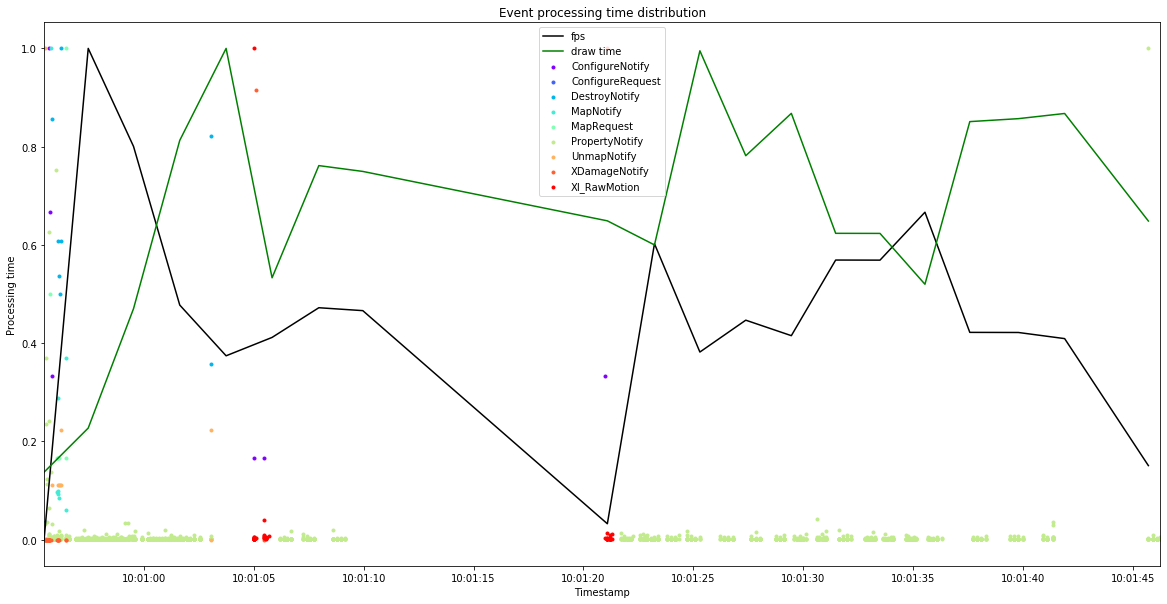

In [5]:
plt.figure(figsize=(20,10))
plt.title('Event processing time distribution')
plt.xlabel("Timestamp")
plt.ylabel("Processing time")

groups = df.groupby("type")
colors = cm.rainbow(np.linspace(0, 1, len(groups)))
for color, (name, values) in zip(colors, groups):
    cost = values["processing_time"]
    plt.scatter(values["print_time"], cost / cost.max(), marker='.', color=color, label=name)
fps = df[~pd.isna(df['fps'])]
plt.plot(fps["print_time"], fps["fps"] / fps["fps"].max(), color='black', label="fps")
plt.plot(fps["print_time"], fps["draw_time"] / fps["draw_time"].max(), color='green', label="draw time")
plt.xlim([df.print_time.min(), df.print_time.max()])
plt.legend()
plt.show()

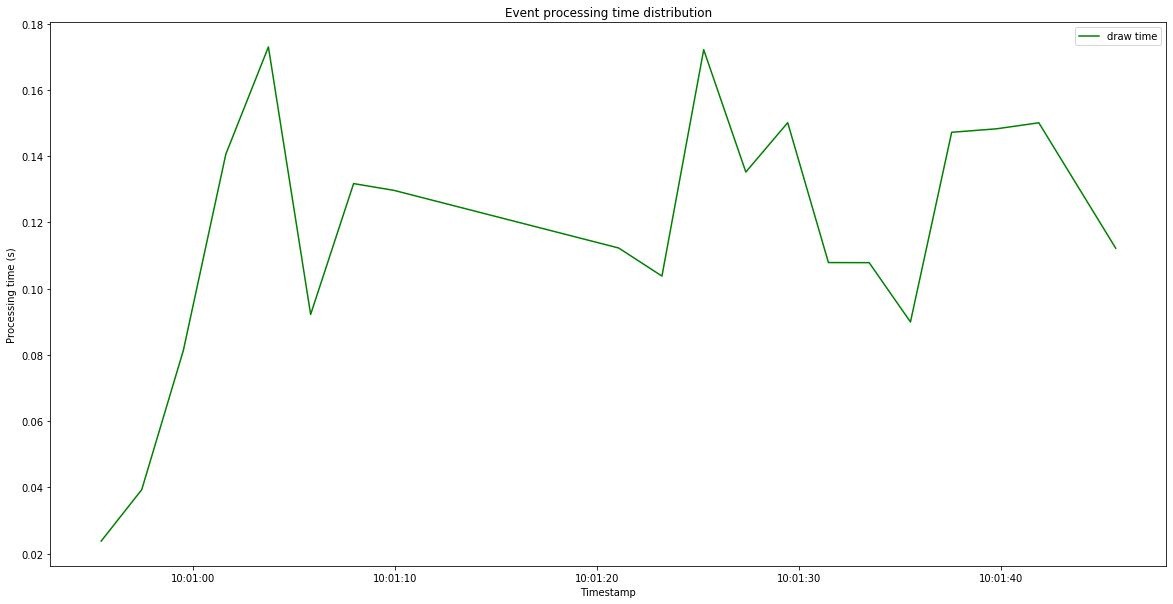

In [11]:
plt.figure(figsize=(20,10))
plt.title('Event processing time distribution')
plt.xlabel("Timestamp")
plt.ylabel("Processing time (s)")

fps = df[~pd.isna(df['fps'])]
plt.plot(fps["print_time"], fps["draw_time"], color='green', label="draw time")
plt.legend()
plt.show()

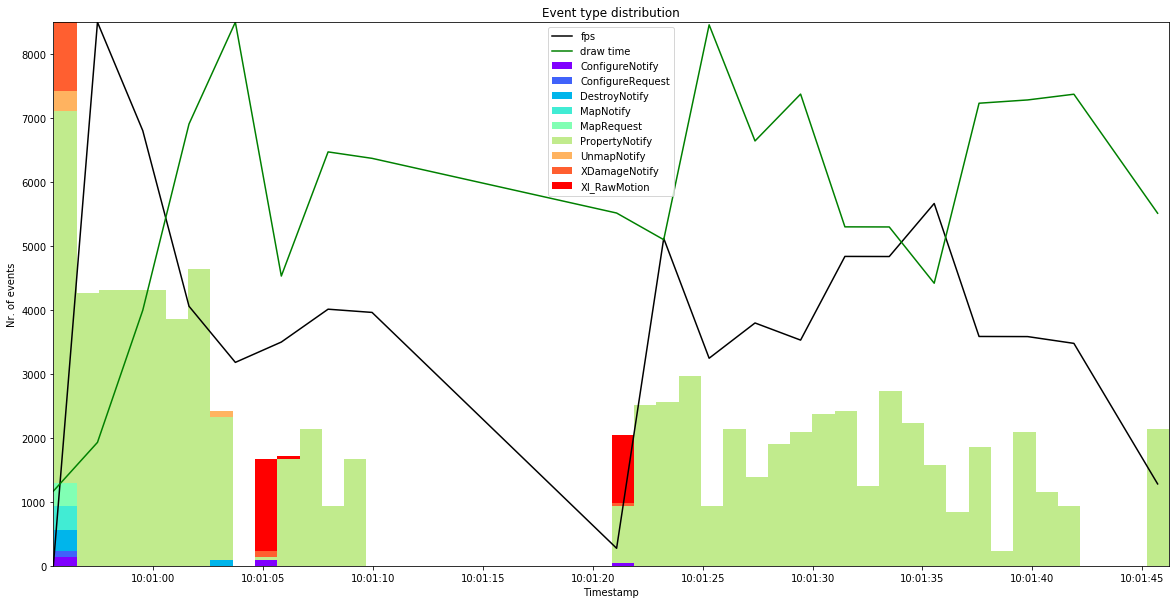

In [6]:
plt.figure(figsize=(20,10))
plt.title('Event type distribution')
plt.xlabel("Timestamp")
plt.ylabel("Nr. of events")

groups = df.groupby("type")
colors = cm.rainbow(np.linspace(0, 1, len(groups)))
plt.hist([values["print_time"] for name, values in groups],
         label=[name for name, values in groups],
         color=colors, density=True, stacked=True, bins=50)
scale = plt.axis()[3]
fps = df[~pd.isna(df['fps'])]
plt.plot(fps["print_time"], scale * fps["fps"] / fps["fps"].max(), color='black', label='fps')
plt.plot(fps["print_time"], scale * fps["draw_time"] / fps["draw_time"].max(), color='green', label='draw time')
plt.xlim([df.print_time.min(), df.print_time.max()])
plt.legend()
plt.show()

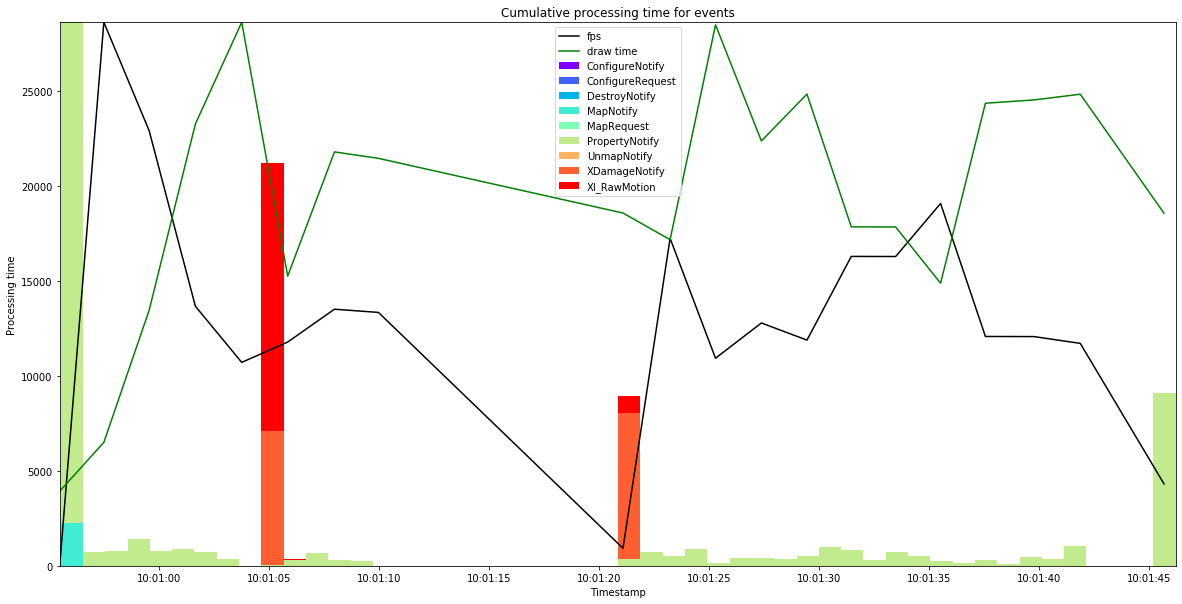

In [7]:
plt.figure(figsize=(20,10))
plt.title('Cumulative processing time for events')
plt.xlabel("Timestamp")
plt.ylabel("Processing time")


groups = df.groupby("type")
colors = cm.rainbow(np.linspace(0, 1, len(groups)))
plt.hist([values["print_time"] for name, values in groups],
         weights=[values["processing_time"] for name, values in groups],
         label=[name for name, values in groups],
         color=colors, density=True, stacked=True, bins=50)
scale = plt.axis()[3]
fps = df[~pd.isna(df['fps'])]
plt.plot(fps["print_time"], scale * fps["fps"] / fps["fps"].max(), color='black', label="fps")
plt.plot(fps["print_time"], scale * fps["draw_time"] / fps["draw_time"].max(), color='green', label="draw time")
plt.xlim([df.print_time.min(), df.print_time.max()])
plt.legend()
plt.show()

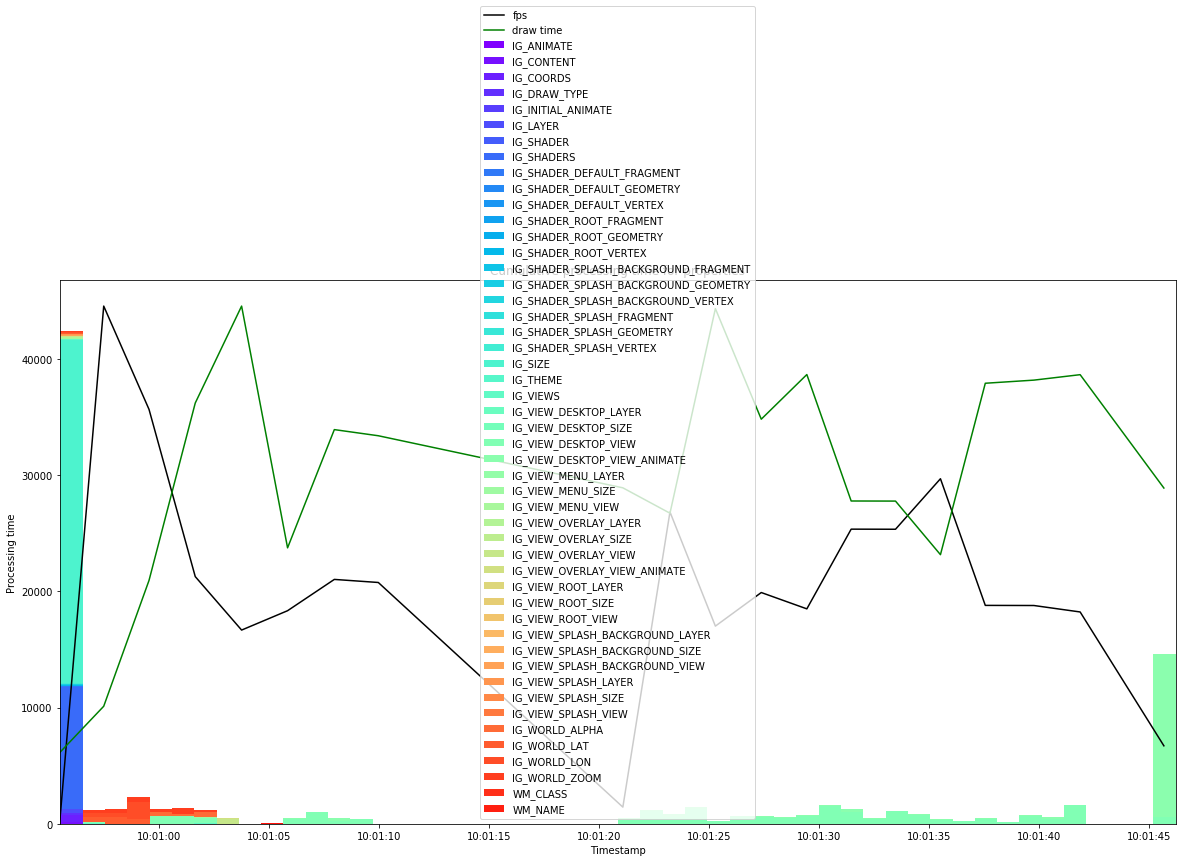

In [8]:
plt.figure(figsize=(20,10))
plt.title('Cumulative processing time for properties')
plt.xlabel("Timestamp")
plt.ylabel("Processing time")

groups = df[~pd.isna(df["name"]) & ~pd.isna(df["processing_time"])].groupby("name")
colors = cm.rainbow(np.linspace(0, 1, len(groups)))

plt.hist([values[~pd.isna(values["processing_time"])]["print_time"] for name, values in groups],
         weights=[values[~pd.isna(values["processing_time"])]["processing_time"] for name, values in groups],
         label=[name for name, values in groups],
         color=colors, density=True, stacked=True, bins=50)
scale = plt.axis()[3]
fps = df[~pd.isna(df['fps'])]
plt.plot(fps["print_time"], scale * fps["fps"] / fps["fps"].max(), color='black', label="fps")
plt.plot(fps["print_time"], scale * fps["draw_time"] / fps["draw_time"].max(), color='green', label="draw time")
plt.xlim([df.print_time.min(), df.print_time.max()])
plt.legend()

plt.show()

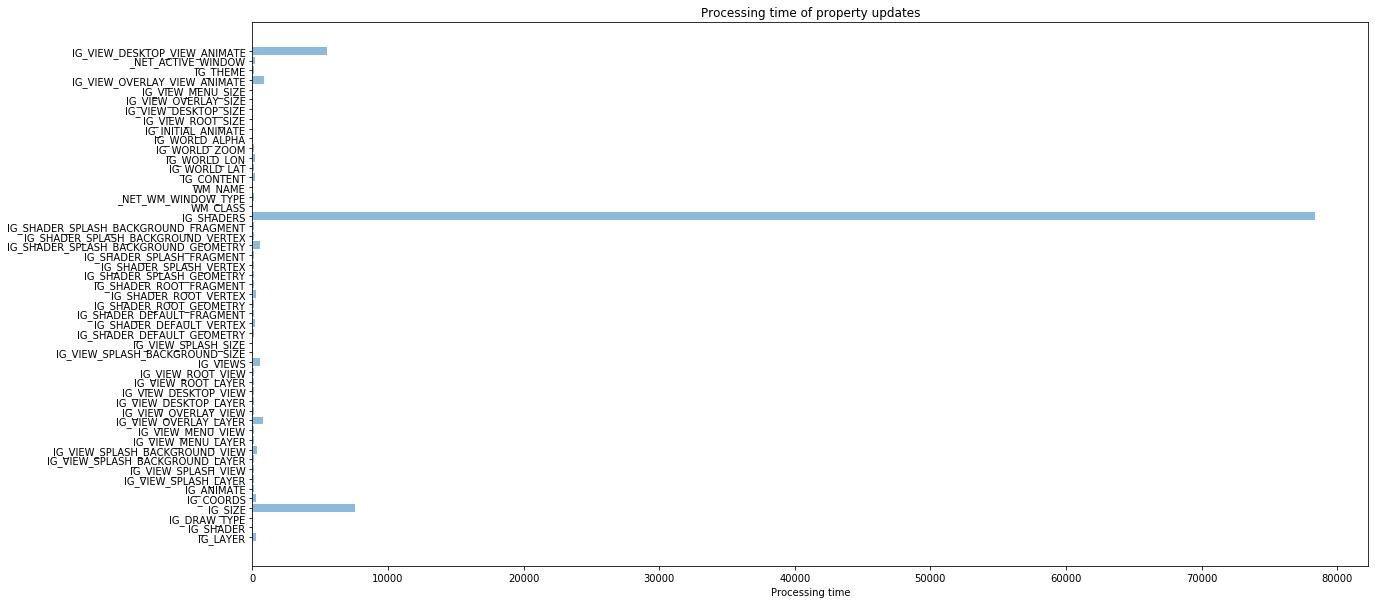

In [9]:
plt.figure(figsize=(20,10))

data_with_time = df[~pd.isna(df["name"]) & ~pd.isna(df["processing_time"])]
objects = data_with_time["name"].unique()
y_pos = np.arange(len(objects))
performance = [np.mean(data_with_time[data_with_time["name"] == name]["processing_time"])
               for name in objects]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Processing time')
plt.title('Processing time of property updates')

plt.show()

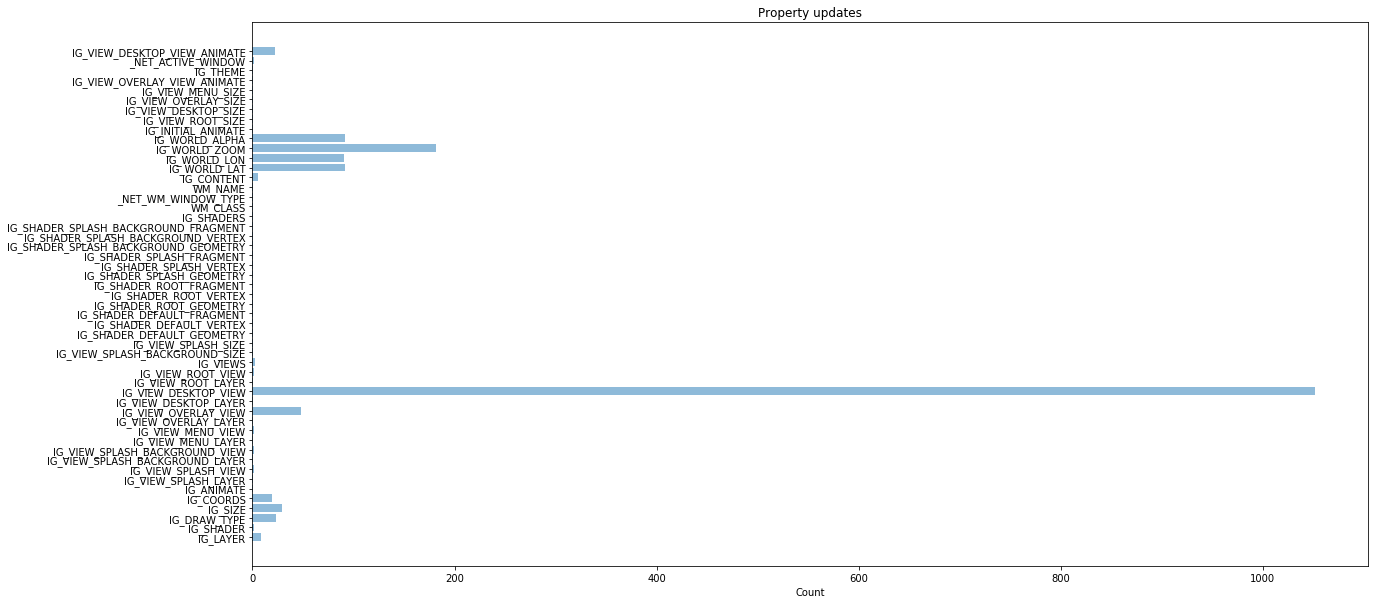

In [10]:
plt.figure(figsize=(20,10))

data_with_time = df[~pd.isna(df["name"]) & ~pd.isna(df["processing_time"])]
objects = data_with_time["name"].unique()
y_pos = np.arange(len(objects))
performance = [len(data_with_time[data_with_time["name"] == name])
               for name in objects]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count')
plt.title('Property updates')

plt.show()